## Business question: What is the likelihood of a

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


In [131]:
# load dataset from github
data = pd.read_csv('/Users/WhyattFoster/Downloads/german_credit_data.csv') 
df = pd.read_csv('https://raw.githubusercontent.com/mturner49/ifi-8420-group/main/datasets/german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [132]:
# drop unnamed col
data.drop(columns = 'Unnamed: 0', inplace =True)

# Check missing values
data.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Risk                  0
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [133]:
#We wll do mode imputer since this is a dicrete data 
from sklearn.impute import SimpleImputer

#mode imputer
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

data['Checking account'] = mode_imputer.fit_transform(data[['Checking account']])
data['Saving accounts'] = mode_imputer.fit_transform(data[['Saving accounts']])

data.isnull().sum().sort_values(ascending=False)

Risk                0
Purpose             0
Duration            0
Credit amount       0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
Age                 0
dtype: int64

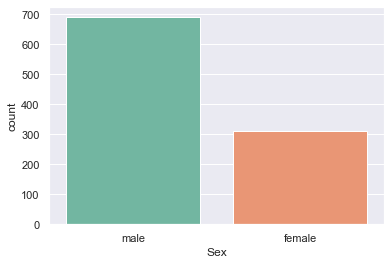

In [134]:
data["Sex"].value_counts()

#plotting bar graph
sn.set_theme(style="darkgrid")
ax = sn.countplot(data.Sex, palette="Set2")

In [135]:
# from plotly import tools
# import plotly.graph_objs as go


# by_age = data['Age'].values.tolist()
# male_age = data['Age'].loc[data['Sex'] == 'male'].values.tolist()
# female_age = data['Age'].loc[data['Sex'] == 'female'].values.tolist()

# trace0 = go.Histogram(
#     x=male_age,
#     histnorm='probability',
#     name="German Male",
#     marker = dict(
#         color = 'rgba(100, 149, 237, 0.6)',
#     )
# )
# trace1 = go.Histogram(
#     x=female_age,
#     histnorm='probability',
#     name="German Female",
#     marker = dict(
#         color = 'rgba(255, 182, 193, 0.6)',
#     )
# )
# trace2 = go.Histogram(
#     x=by_age,
#     histnorm='probability',
#     name="Overall Gender",
#      marker = dict(
#         color = 'rgba(169, 169, 169, 0.6)',
#     )
# )
# fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
#                           subplot_titles=('Males','Female', 'All Genders'))

# fig.append_trace(trace0, 1, 1)
# fig.append_trace(trace1, 1, 2)
# fig.append_trace(trace2, 2, 1)

# fig['layout'].update(showlegend=True, title='Distribution of Gender', bargap=0.05)


In [136]:
data["Purpose"].unique()
sex_purpose = pd.crosstab(data['Purpose'], data['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [137]:
# group risky and non-risky loans.
data['Age_Group'] = np.nan

a = [data]

for col in a:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
    
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,little,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,little,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


<AxesSubplot:xlabel='Age', ylabel='Count'>

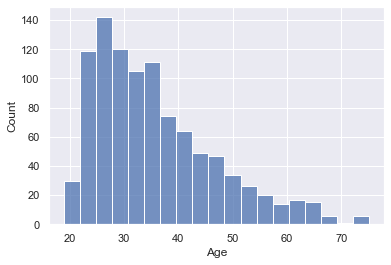

In [138]:
# plot histogram, 
import seaborn as sn
sn.histplot(data.Age)

<AxesSubplot:xlabel='Age'>

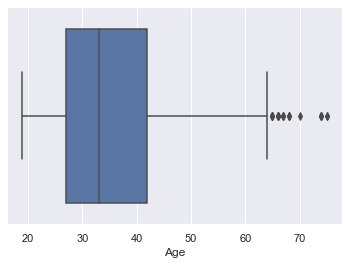

In [139]:
sn.boxplot(data.Age)

2    630
1    200
3    148
0     22
Name: Job, dtype: int64
own     713
rent    179
free    108
Name: Housing, dtype: int64


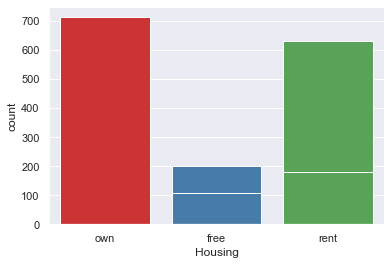

In [161]:
def count_plots(data):
    #Jobs
    data.Job.value_counts()
    print(job_counts)
    #plotting bar graph
    sn.set_theme(style="darkgrid")
    ax = sn.countplot(data.Job, palette="Set1")
    
    #Housing
    data.Housing.value_counts()
    print(housing_counts)
    #plotting bar graph
    sn.set_theme(style="darkgrid")
    ax = sn.countplot(data.Housing, palette="Set1")
count_plots(data)

2    630
1    200
3    148
0     22
Name: Job, dtype: int64


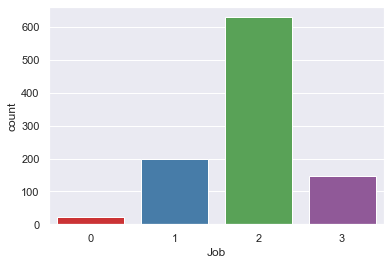

own     713
rent    179
free    108
Name: Housing, dtype: int64


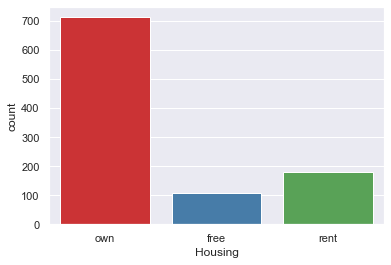

In [141]:
#We will analyse Housing column now.
housing_counts = data.Housing.value_counts()
print(housing_counts)

#plotting bar graph
sn.set_theme(style="darkgrid")
ax = sn.countplot(data.Housing, palette="Set1")

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


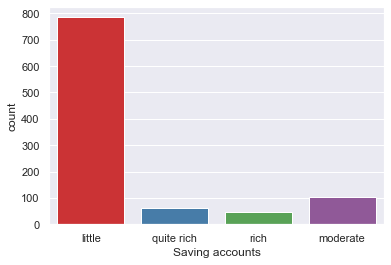

In [142]:
#We will analyse Saving accounts column now.
savings_count = data['Saving accounts'].value_counts()
print(savings_count)
#plotting bar graph
sn.set_theme(style="darkgrid")
ax = sn.countplot(data['Saving accounts'], palette="Set1")

little      668
moderate    269
rich         63
Name: Checking account, dtype: int64


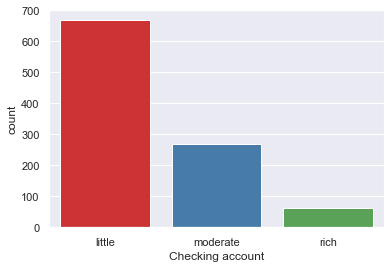

In [143]:
#We will analyse Saving accounts column now.
checkings_count = data['Checking account'].value_counts()
print(checkings_count)
#plotting bar graph
sn.set_theme(style="darkgrid")
ax = sn.countplot(data['Checking account'], palette="Set1")



data['Credit amount']_mean 3271.258
data['Credit amount']_median 2319.5
data['Credit amount']_var 7967843.470906904
data['Credit amount']_skew 1.9496276798326209
data['Credit amount']_kurt 4.29259030804851
data['Credit amount']_mode 0    1258
1    1262
2    1275
3    1393
4    1478
dtype: int64




<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

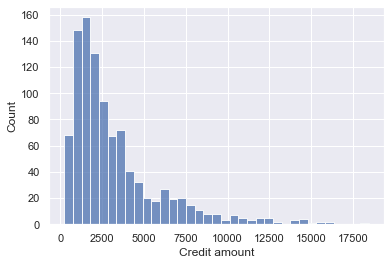

In [145]:

sn.histplot(data['Credit amount'])

<AxesSubplot:xlabel='Credit amount'>

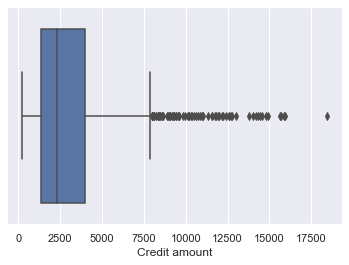

In [146]:
sn.boxplot(data['Credit amount'])


In [162]:
data.Age.describe()
print('\n')
print("data['Duration']_mean", data.Duration.mean())
print("data['Duration']_median", data.Duration.median())
print("data['Duration']_var", data.Duration.var())
print("data['Duration']_skew", data.Duration.skew())
print("data['Duration']_kurt", data.Duration.kurt())
print("data['Duration']_mode", data.Duration.mode())
print('\n')



data['Duration']_mean 20.903
data['Duration']_median 18.0
data['Duration']_var 145.41500600600645
data['Duration']_skew 1.0941841715555418
data['Duration']_kurt 0.9197813600546372
data['Duration']_mode 0    24
dtype: int64




<AxesSubplot:xlabel='Duration', ylabel='Count'>

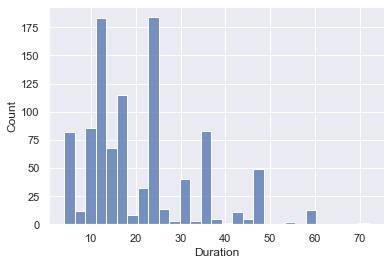

In [148]:
import seaborn as sn
sn.histplot(data.Duration)

<AxesSubplot:xlabel='Duration'>

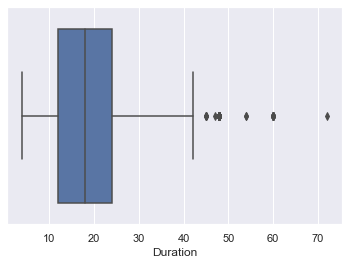

In [149]:
#boxplot duration
sn.boxplot(data.Duration)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'radio/TV'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'car'),
  Text(4, 0, 'business'),
  Text(5, 0, 'domestic appliances'),
  Text(6, 0, 'repairs'),
  Text(7, 0, 'vacation/others')])

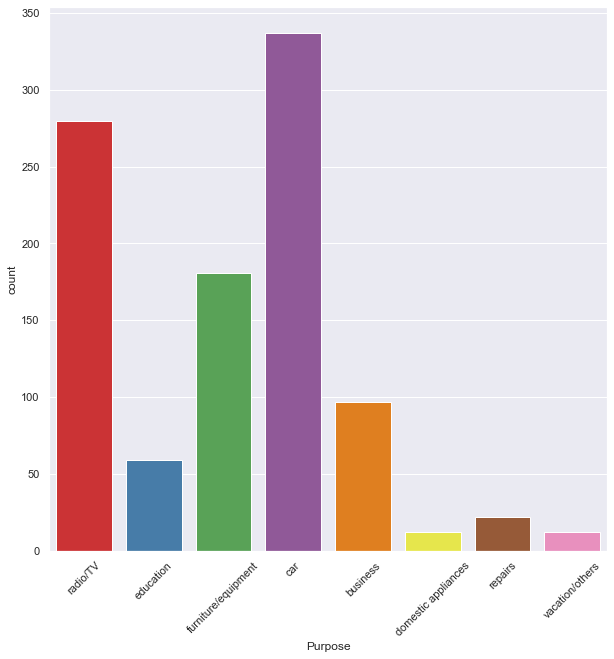

In [150]:
#plotting bar graph Purpose

fig, ax = plt.subplots(figsize=(10, 10))
sn.set_theme(style="darkgrid")
ax = sn.countplot(data['Purpose'], palette="Set1")
plt.xticks(rotation=45)

In [151]:
# resolve the outlier problem through Wisorization method.
# ! pip install feature_engine

In [152]:
import plotly.express as px
# purpose vs credit amount

SC =data.loc[:,['Purpose','Credit amount']]
fig = px.box(SC, x="Purpose", y="Credit amount", color="Purpose")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(
    title={
          'text':"Purpose Vs Credit Amount Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Purpose",
    yaxis_title="Credit amount",
   
)
fig.show()

In [153]:
data['Risk_int'] = data['Risk'].map({'bad':0, 'good':1})


In [154]:
# risk = [data]
# for col in risk:
#     col.loc[data['Risk'] == 'bad', 'Risk_int'] = 0 
#     col.loc[data['Risk'] == 'good', 'Risk_int'] = 1
# df['Risk_int'] = df['Risk_int'].astype(int)

# Split the dataset between good and bad credit
gc_df = data.loc[data['Risk'] == "good"]
bc_df = data.loc[data['Risk'] == "bad"]

gc_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,67,male,2,own,little,little,1169,6,radio/TV,good,Elder,1
2,49,male,1,own,little,little,2096,12,education,good,Senior,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,1
5,35,male,1,free,little,little,9055,36,education,good,Young Adults,1
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good,Senior,1


In [155]:
# Lets find loans by age group and by the level of risk and plot them in a bar chart.
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Age Group Segments
young_good = data['Credit amount'].loc[(data['Age_Group'] == 'Young') & (data['Risk'] == 'good')].sum()
young_bad = data['Credit amount'].loc[(data['Age_Group'] == 'Young') & (data['Risk'] == 'bad')].sum()
young_adult_good = data['Credit amount'].loc[(data['Age_Group'] == 'Young Adults') & (data['Risk'] == 'good')].sum()
young_adult_bad = data['Credit amount'].loc[(data['Age_Group'] == 'Young Adults') & (data['Risk'] == 'bad')].sum()
senior_good = data['Credit amount'].loc[(data['Age_Group'] == 'Senior') & (data['Risk'] == 'good')].sum()
senior_bad = data['Credit amount'].loc[(data['Age_Group'] == 'Senior') & (data['Risk'] == 'bad')].sum()
elder_good = data['Credit amount'].loc[(data['Age_Group'] == 'Elder') & (data['Risk'] == 'good')].sum()
elder_bad = data['Credit amount'].loc[(data['Age_Group'] == 'Elder') & (data['Risk'] == 'bad')].sum()

# Percents
young_good_p = young_good/(young_good + young_bad) * 100
young_bad_p = young_bad/(young_good + young_bad) * 100
young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

# Round Percents
young_good_p = str(round(young_good_p, 2))
young_bad_p = str(round(young_bad_p, 2))
young_adult_good_p = str(round(young_adult_good_p, 2))
young_adult_bad_p = str(round(young_adult_bad_p, 2))
senior_good_p = str(round(senior_good_p, 2))
senior_bad_p = str(round(senior_bad_p, 2))
elder_good_p = str(round(elder_good_p, 2))
elder_bad_p = str(round(elder_bad_p, 2))

x = ["Young", "Young Adults", "Senior", "Elder"]

good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Loans",
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
    opacity=0.6
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Loans",
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    opacity=0.6
)

data1 = [good_loans, bad_loans]

layout = dict(
    title="Type of Loan by Age Group", 
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data1, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

In [163]:
import plotly.figure_factory as ff


corr = data.corr()

arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'German Credit Risk'
iplot(fig, filename='annotated_heatmap')

In [157]:
dimension = pd.DataFrame({'mean': data.mean(),
'sd': data.std(),
'min': data.min(),
'max': data.max(),
'median': data.median(),
'length': len(data),
'miss.val': data.isnull().sum(),
})
dimension.head()

,mean,sd,min,max,median,length,miss.val
Age,35.546,11.375469,19,75,33.0,1000,0
Age_Group,NaN,NaN,Elder,Young Adults,NaN,1000,0
Checking account,NaN,NaN,little,rich,NaN,1000,0
Credit amount,3271.258,2822.736876,250,18424,2319.5,1000,0
Duration,20.903,12.058814,4,72,18.0,1000,0


In [129]:
data.corr().round(2)

,Unnamed: 0,Age,Job,Credit amount,Duration
Unnamed: 0,1.00,-0.01,-0.03,0.01,0.03
Age,-0.01,1.00,0.02,0.03,-0.04
Job,-0.03,0.02,1.00,0.29,0.21
Credit amount,0.01,0.03,0.29,1.00,0.62
Duration,0.03,-0.04,0.21,0.62,1.00
